# FINAL PROJECT MA-336

# 2110387


# Artificial Intelligence-Algorithm on Lending Club Data


# Introduction:

Handling the finances of the company is a crucial job to perform, the company is always on the stack before investing its assets and resources in a market. any organisation's financial advisor's main job is to find the correct and reliable source where the company can invest and perform groundwork or analysis about the landing party, so that company will not face default due to future loans.

This Report is about the Artificial Intelligence Algorithm of Decision tree and Random Forest to predict that the future investment of the investors will not be plummed while landing the money to the borrowers. For this project, we acquired data from lendingclub.com from the open publicly source Kaggle.

The lending Club used the traditional method of consumer banking, once the application is received from the consumer lending club evaluates the loan decision based on the information provided by the individual. the important point is that in-person evaluations are not involved in the whole process. This AI algorithm model help to predict the credibility of the individuals and on basis of that investors will be able to invest their money.

The main objective of the data set is to find out the probability that borrowers will return the loan amount of investors, and predict the model through analysis of the chances of investors' money will not get fall. for that different variables have been chosen to check the credibility of the borrowers like credit score, borrower's debt-to-income ratio, borrower's revolving balance and public record.

The motivation behind choosing this dataset is because my previous background is in economics and finance and I used to work as the Asset advisor from the German company Deutsche Vermögensberatung (DVAG).handling people's loans and investments are one of the parts of my job description. foreigners who came to Germany for investment and education purpose and wants to invest their amount of money in the market for better return but face some problem due to limited knowledge of German tax laws and importantly language barrier then my team facilitate them to invest their money or Assets smartly in the market. During working with Dvag last year 2021, I got to know about the American company of lending loans called lending Club formed in 2006 in San Francisco, Califonia and a subsidiary of Lending Club Bank. The company's main operation is a peer-to-peer lending platform, which helps to connect borrowers and investors. Investors mostly want to invest in those customers or borrowers whose profile shows a piece of credible information and provides satisfaction to the investor that their investment will not get fall. In that regard lending Club performs evaluation and underwriting of both parties.

The historical data gathered from 2007 to 2015 divided them into 14 variables in which credit policy is divided between 1 and 0, 1 represents the customer return of the loan on time and 0 the other way around; dti represents the borrower's debt-to-income ratio means the amount of debt divided by annual income, "revol.bal" represents the borrower's revolving balance i.e. unpaid amount of the credit card at the end of the billing cycle, "revol.util" describes the borrower's revolving utilization rate i.e. the amount of the credit line used relative to total credit available, the FICO is the credit score of the borrower, log. annual.inc defines the annual income of the borrower in log terms and pub. rec, explains the public record of the lander. the other factors are self-explanatory like interest rate and instalment.





# Methods:


To perform the Algorithm in the Lending club dataset, the following steps were used;

1. Firstly start the project by importing the libraries and uploading data into the jupyter notebook for further evaluation of the data set.
2. Fetch the information about the dataset.
3. Perform the descriptive analysis on the data set, which provides the information of min, max, mean, count, standard deviation and the 25%, 50% and 75% rows show the corresponding percentiles.
4. For visualisation analysis of the data, the exploratory analysis will perform by using pandas and the seaborn library. 
5. In-depth Exploratory analysis, provide information about the histogram of FICO distribution(credit score of the lander), comparison of paid and not fully paid loans, counts of loans by purpose, joinplot between Fico and interest rate, 
6. After EDA, the Train test split performs on data.
7. By using the library of sklearn decision tree algorithm is performed with the confusion matrix.
8. For performance measurement of decision tree (ROC)Receiver operating characteristic curve is used.
9. By using the library of sklearn Random Forest algorithm is performed with the confusion matrix.
10. summerise and explanation of report in conclusion.



In [69]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [70]:
FP = pd.read_csv('C:/Users/yasir/Desktop/Essex/336/final project/data_loan_final.csv')

# Preliminary analyses:

This report first perform the preliminary analysis on the data set by fetching the information, as we already check the source and variables of the data set, so now we need to know the inside aspects of variable;

While performing the preliminary analysis of the dataset we find out that, the loan borrowing reasons mentioned here are; debt consolidation, credit card, home improvement, small business, major purchase, education and all others.

In [71]:
FP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


The above information explains that the total entries are 9577 and all the variables are in the integer or float form except purpose, which is in object foam.  Moreover, the data set has no missing values, because range index is 9578.

In [72]:
a = len(FP[FP['purpose']=='debt_consolidation'])
b = len(FP[FP['purpose']=='credit_card'])
c = len(FP[FP['purpose']=='home_improvement'])
d = len(FP[FP['purpose']=='small_business'])
e = len(FP[FP['purpose']=='major_purchase'])
f = len(FP[FP['purpose']=='educational'])
g = len(FP[FP['purpose']=='all_other'])
h = len(FP['purpose'])



In [73]:
FP1 = [ ['debt_consolidation', a, a/h], ['credit_card', b, b/h], ['home_improvement', c, c/h],
 ['small_business', d, d/h], ['major_purchase', e, e/h], ['educational', f, f/h],
 ['all_other', g ,g/h]]

In [74]:
FPcount = pd.DataFrame(FP1, columns = ['Loan Purpose', 'Count', 'Percentage'])
print (FPcount)

         Loan Purpose  Count  Percentage
0  debt_consolidation   3957    0.413134
1         credit_card   1262    0.131760
2    home_improvement    629    0.065671
3      small_business    619    0.064627
4      major_purchase    437    0.045625
5         educational    343    0.035811
6           all_other   2331    0.243370


In [75]:
FP.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [76]:
FP.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [77]:
FP.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

It shows that there is no missing values in the dataset


## Exploratory Data Analysis

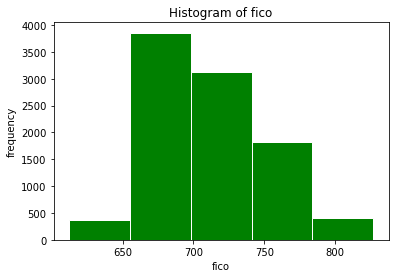

In [78]:

plt.hist(FP['fico'],color='green',edgecolor='white',bins=5)
plt.title('Histogram of fico')

plt.xlabel('fico')
plt.ylabel('frequency')

plt.show()


The Histogram of Fico(credit score of the borrower ) explains the frequency distribution of the variable in our given dataset of lending loans.


Text(0.5, 0, 'FICO')

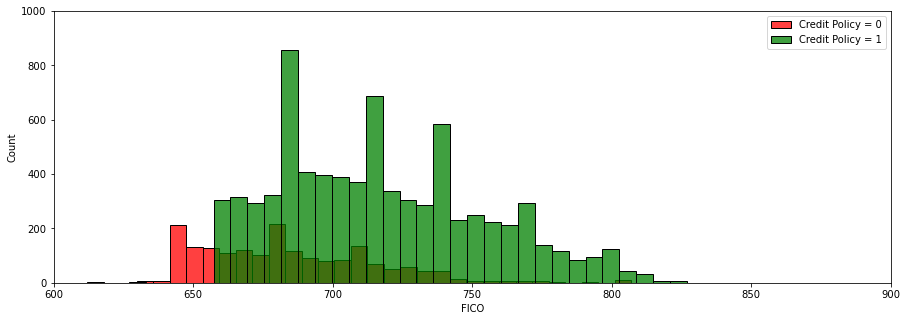

In [79]:
plt.subplots(figsize = (15,5))

sns.histplot(FP[FP['credit.policy'] == 0]['fico'], bins = 33, kde = False, color = 'red', label = 'Credit Policy = 0')
sns.histplot(FP[FP['credit.policy'] == 1]['fico'], bins = 33, kde = False, color = 'green', label = 'Credit Policy = 1')

plt.xlim(600,900)
plt.ylim(0,1000)

plt.legend(loc = 1)
plt.xlabel('FICO')


The above histogram explains the comparison between the one for each credit policy outcome, which means the credit score of the borrower who returns on time consider 1 and those who do not consider 0.


Text(0.5, 0, 'FICO')

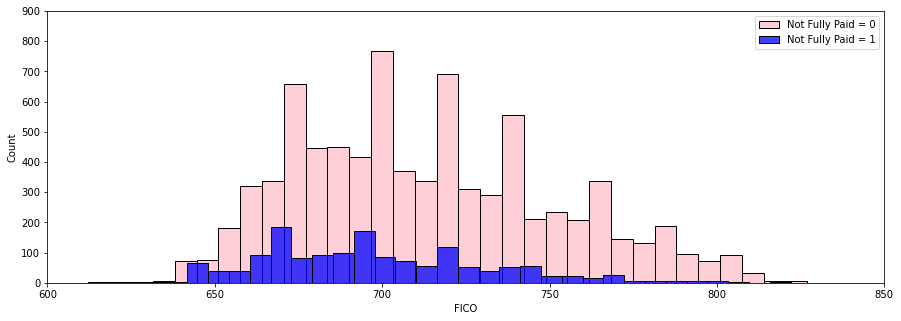

In [80]:
plt.subplots(figsize = (15,5))

sns.histplot(FP[FP['not.fully.paid'] == 0]['fico'], bins = 33, kde = False, color = 'pink', label = 'Not Fully Paid = 0')
sns.histplot(FP[FP['not.fully.paid'] == 1]['fico'], bins = 33, kde = False, color = 'blue', label = 'Not Fully Paid = 1')

plt.xlim(600,850)
plt.ylim(0,900)

plt.legend(loc = 1)
plt.xlabel('FICO')


The above histogram explains the statics of the count of loans by purpose, not fully paid by the borrowers. (binary (not fully paid): 1, means "Yes", 0 means "No")


<AxesSubplot:xlabel='purpose', ylabel='count'>

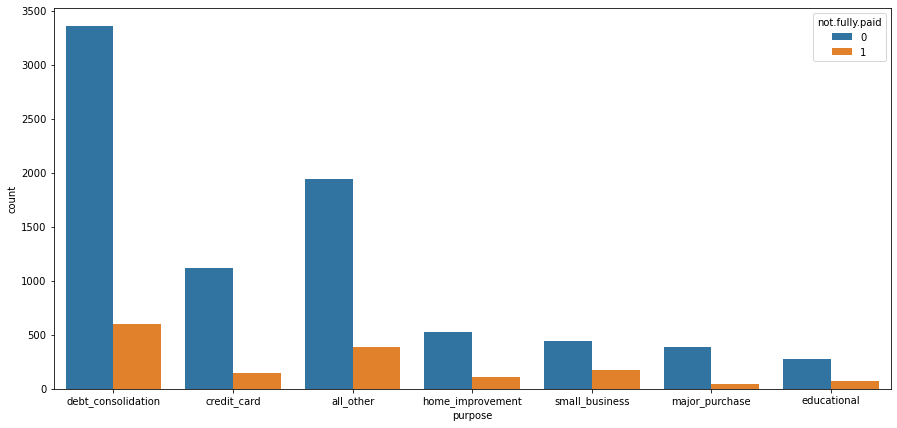

In [81]:
plt.subplots(figsize = (15,7))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = FP)

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

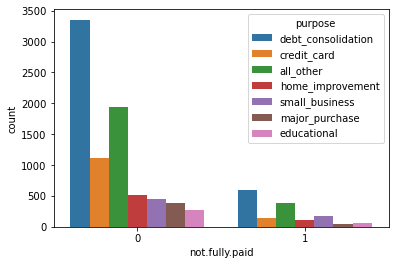

In [82]:
sns.countplot(data=FP, x='not.fully.paid', hue='purpose')


The above two countplot, explains the counts of loans by purpose, it represents that the loan taking with the purpose of debt consolidation is the highest which is never fully paid off, on the other hand, land for the purpose of education is the least in demand.


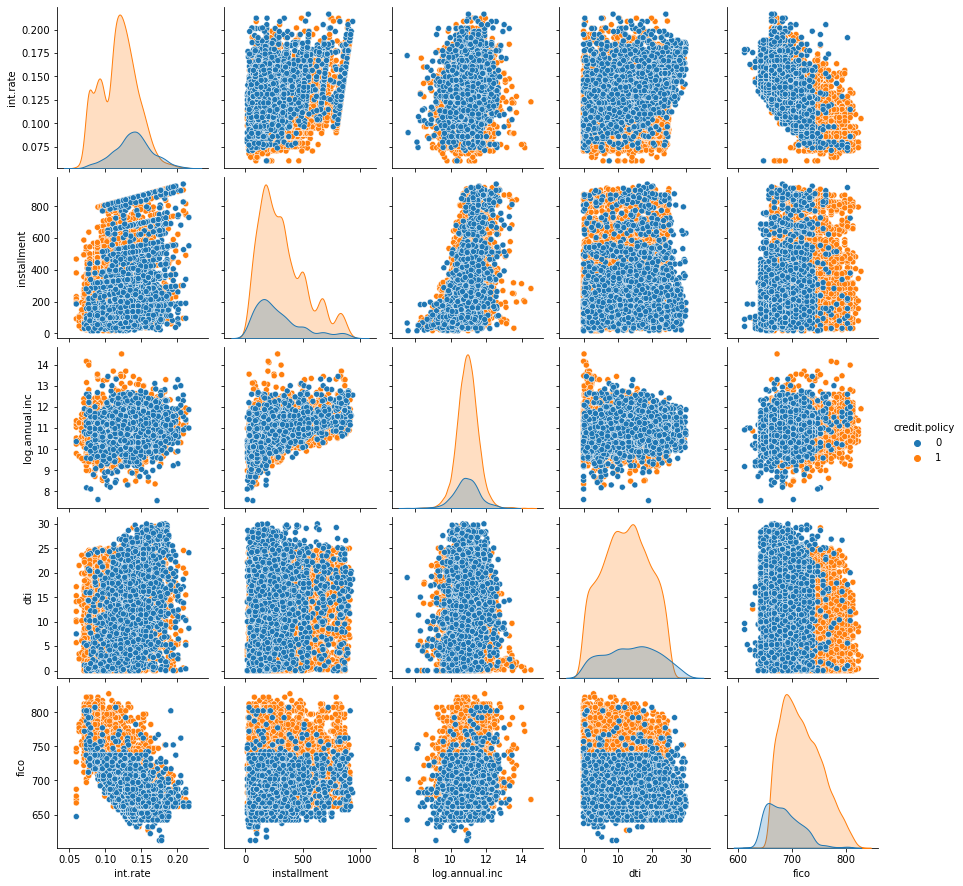

In [83]:
sns.pairplot(FP.iloc[:, :7], hue='credit.policy')


To capture the pairwise relationship of the variables in the dataset a pair plot has been constructed. The pair plot function has an advantage that creates a grid of Axes, in that way each variable in data will be split on the y-axis over a single row and also on the x-axis across a single column.


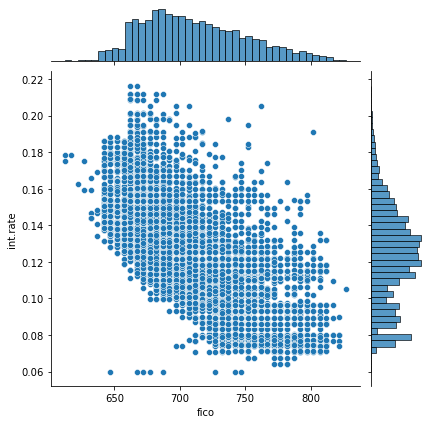

In [84]:
sns.jointplot(x = 'fico', y = 'int.rate', data = FP)

The above joinplot explains the relationship between interest rate and fico, and the histogram created on the x and y axis explains how the marginal distribution of each factor looks. increasing or decreasing the interest rate directly affects the credit rating of the borrower, as the amount of money invested in the market affects the change in interest rate. here, we can say that a higher interest rate higher fico means a direct relationship

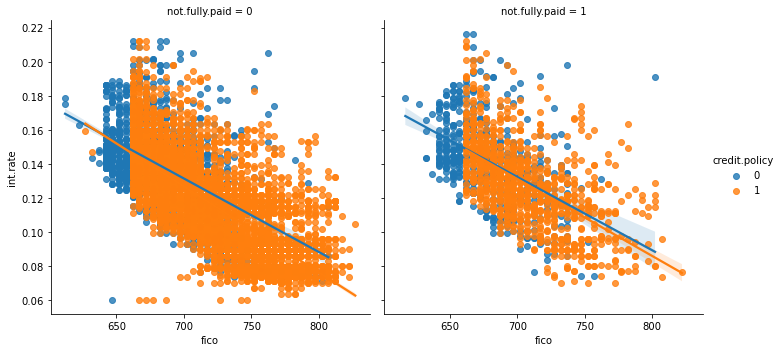

In [85]:
sns.lmplot(x = 'fico', y = 'int.rate', col = 'not.fully.paid', hue = 'credit.policy', data = FP)


The above lmplot represents the trend between the not fully paid and credit policy has differed mode with a comparison  of fico.


 # Results:

For the evaluation of the results, we are applying the AI algorithm of decision tree and random forest on the dataset after exploratory analysis of the variables, before moving forward, as highlighted earlier that the "purpose" variable is in an object or categorical foam, therefore its needs to be transformed into an indicator variable so that the sklearn library will read it. by using pd.get_dummies we transform the variable in a dummy variable.


In [86]:
FP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [87]:
loan_reason = ['purpose']

In [88]:
Loan_data = pd.get_dummies(FP, columns = loan_reason, drop_first = True)

In [89]:
Loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0



here we change the purpose in the list and called as Loan_reason. now we used pd.get_dummies, so which creates a new data frame with the name of **Loan_Data** with the inclusion of dummy variables.

In [90]:
Loan_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')


### Train Test Split

The train-test split method is used to estimate the execution of machine learning algorithms that are valid for prediction-based Algorithms/Applications. This method is a fast and easy procedure to perform such that we can assess our machine learning model results to machine results.
here, we are using the Sklearn library to split train and test data to make predictions.


In [91]:
from sklearn.model_selection import train_test_split

In [92]:

X = Loan_data.drop('not.fully.paid', axis = 1)
y = Loan_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state= 101)


## Decision Tree Model:

For the application of the algorithm, first using the decision tree model, is part of supervised machine learning techniques and predictions based on how a previous set of questions were answered. A decision tree is highly used and recommended for decision-making techniques because it split the data into two branches testing and training sets for prediction.

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
dtree = DecisionTreeClassifier()

In [95]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In the above code, we try to build a decision tree model, here we import a decision tree classifier from the Sklearn library, a non-parametric supervised learning method and then we fit it in the decision tree model.


### Confusion Matrix

In [96]:
y_predict = dtree.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix, classification_report

In [98]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [99]:

print(confusion_matrix(y_test, y_predict))

[[1997  434]
 [ 337  106]]


In [100]:
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1997,434,2431
1,337,106,443
All,2334,540,2874


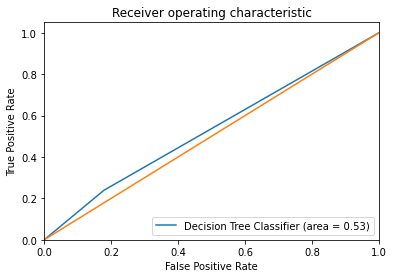

In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

model_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % model_roc_auc)
plt.plot([0,1],[0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('DT_ROC')
plt.show()


The ROC(receiver operating characteristics)defines the graphical representation of the accuracy of the model, In the Above ROC graph, the orange line represents that purely random classifier and the AUC(Area under the curve) shows 0.53, as it is closer to 0.5 it represents that model performs a poor job of classifying the data. For a good classifier, the blue line must be far away from the orange line.


In [102]:
loans_features = [x for i,x in enumerate(X.columns) if i!=len(X.columns)]
print("Feature importances:\n{}".format(dtree.feature_importances_))


Feature importances:
[0.02712483 0.10379649 0.12892237 0.11480493 0.11331421 0.06943402
 0.12124592 0.11957496 0.10544368 0.03486822 0.01568973 0.00668339
 0.0053064  0.01216823 0.00470394 0.0059592  0.00314393 0.00781555]


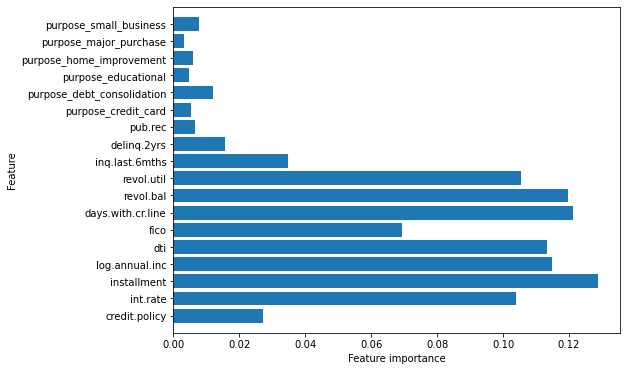

In [105]:

 plt.figure(figsize=(8,6))
 n_features = len(X.columns)
 plt.barh(range(n_features), dtree.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), loans_features)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
 plt.ylim(-1, n_features)

plt.savefig('feature_importance')


By using the tool of feature importance the above bar graph represents the important features to predict the model, according to the above graphical representation is an interest rate which is showing a percentage of around 12.07% of importance in the decision tree model. in financial matters interest rate always play a very important role, because it defines that how high the cost of borrowing than higher the rewards for savings.


## Random Forest Model:


Random forests or random decision forests is a collective learning method for classification, regression and other tasks that operates by building a variety of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
radforest = RandomForestClassifier(n_estimators = 350)

In [108]:
radforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=350)


### Confusion Matrix

In [109]:
y_predict = radforest.predict(X_test)

In [110]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.44      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.64      0.51      0.47      2874
weighted avg       0.78      0.85      0.78      2874



In [111]:

print(confusion_matrix(y_test,y_predict))

[[2422    9]
 [ 436    7]]


In [112]:
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2422,9,2431
1,436,7,443
All,2858,16,2874


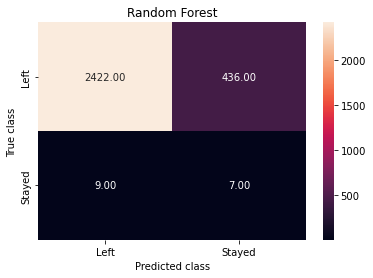

In [113]:
y_pred = radforest.predict(X_test)
from sklearn import metrics
forest_cm = metrics.confusion_matrix(y_pred, y_test,)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

We perform the confusion Matrix to check the performance of the classification algorithm because accuracy alone can be misleading for the model, confusion matrix defines what type of errors are is making.

From the above output of the confusion Matrix of the Decision tree, we can interpret that, the actual loan that was not been paid was **1997** and the full loan paid is **106** out of the total loan of 2874. In the case of Random forest, the statistics of the confusion matrix explained that the actual loan that was not been paid was **2422** and fully paid is only **7** out of the total loan of 2874, which is quite different results from the decision tree confusion matrix.

The Results of this report represent that the Random forest has a Robust and strong modelling technique as compared to the single decision tree model as results are predicted by many decision trees instead of only one decision tree. the random forest model represents the accuracy of **85%**, which is higher accuracy than the decision tree **73%** of accuracy.



# Conclusion:



To execute the analysis of the lending club loan data, we use Python programming and its different libraries for analysis, prediction and evaluation of results. our analysis comprises the introduction, exploratory analysis, Random Forest classification model, decision tree model, train test trail and confusion matrix.

The difference between a decision tree and a random forest is that a decision tree is built on an entire dataset, using all the variables of interest, on the other hand, a random forest randomly selects observations and specific variables to build multiple decision trees from and then averages the results. After a large quantity of trees is built using this approach, each tree votes or selects the class, and the class receiving the highest votes by a simple majority is the winner or predicted class. 

The advantage of a random forest is it gave a better result as compared to a single decision tree because in a random forest each tree randomly selected a classifier and combine prediction from multiple models. Therefore prediction becomes more accurate. In the case of f1-score and Recal Mathord, the single decision tree shows performance better instead of the random tree. But results are dependent upon the metric that the user applied.

In this report, we are trying to find out either borrowers of the loan can pay back the investors or not, by using the supervised AI algorithm of decision tree and random forest, we evaluate that the chances of return of investment are very positive according to both of the methods.

At the end of this report, I conclude by sharing that in starting of this project, I was a beginner in Python programming and jupyter notebook, completing this report was a little bit challenging task for me; this report gave me confidence in my programming skills, and now I am counting it as one of the significant milestones of my life.



# References:

1. https://www.kaggle.com/datasets/urstrulyvikas/lending-club-loan-data-analysis

2. https://www.dvag.de/dvag/index.html

3. https://medium.com/@polanitzer/building-a-decision-tree-classifier-in-python-step-by-step-9d4eeff02292

4. https://amete.github.io/DataSciencePortfolio/Udemy/Python-DS-and-ML-Bootcamp/Decision_Trees_and_Random_Forest_Project.html